In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.sample(10).T

,1870,3885,3685,3277,1482,78,4256,2241,3471,2861
id,60050,70693,65894,2633,11447,45805,41481,6049,12259,65644
gender,Female,Female,Female,Male,Female,Female,Female,Female,Male,Male
age,53.0,28.0,2.0,32.0,41.0,51.0,5.0,5.0,50.0,3.0
hypertension,0,0,0,0,0,0,0,0,0,0
heart_disease,0,1,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No
work_type,Self-employed,Private,children,Private,Govt_job,Private,children,children,Private,children
Residence_type,Urban,Rural,Urban,Rural,Urban,Urban,Rural,Rural,Urban,Urban
avg_glucose_level,113.74,111.27,82.3,71.5,80.28,165.31,64.45,73.69,77.82,57.02
bmi,31.6,19.1,18.8,31.8,37.3,NaN,21.7,24.8,26.7,16.1


<AxesSubplot:>

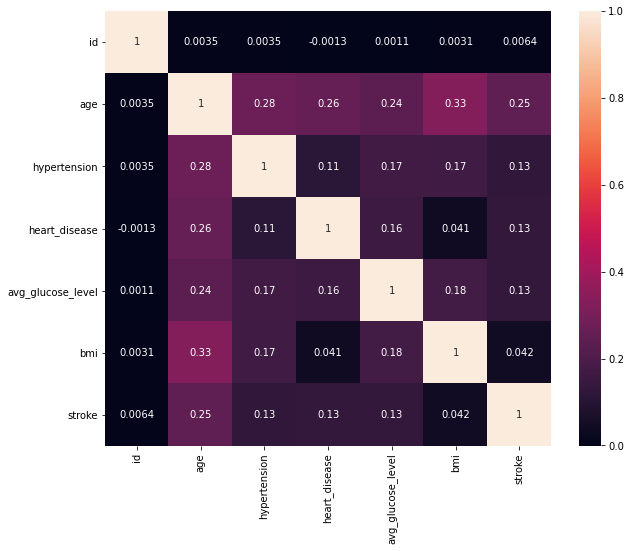

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
df.id.value_counts(dropna = False)  

49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64

In [13]:
df = df.drop(["id"], axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df["ever_married"].value_counts(dropna = False)

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [15]:
df['ever_married'].str.get_dummies()

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5105,0,1
5106,0,1
5107,0,1
5108,0,1


In [16]:
df = pd.concat([df, df['ever_married'].str.get_dummies().add_prefix('ever_married_')], axis=1)

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_No,ever_married_Yes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


In [18]:
df = df.drop(["ever_married"], axis = 1)
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_No,ever_married_Yes
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,0,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


In [19]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0
hypertension,0,0,0,0,1,0,1,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked,formerly smoked,never smoked,never smoked,Unknown,Unknown
stroke,1,1,1,1,1,1,1,1,1,1


In [20]:
df.gender.value_counts(dropna = False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [22]:
df[(df["gender"] == "Other")]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_No,ever_married_Yes
3116,Other,26.0,0,0,Private,Rural,143.33,22.4,formerly smoked,0,1,0


In [24]:
df.drop(df[(df["gender"] == "Other")].index, axis = 0, inplace=True)

In [26]:
df.gender.value_counts(dropna = False)

Female    2994
Male      2115
Name: gender, dtype: int64

In [28]:
df.shape

(5109, 12)

In [27]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
ever_married_No        0
ever_married_Yes       0
dtype: int64

In [30]:
df.bmi.value_counts(dropna = False)

NaN     201
28.7     41
28.4     38
27.7     37
26.7     37
       ... 
46.3      1
40.6      1
48.1      1
59.7      1
54.0      1
Name: bmi, Length: 419, dtype: int64

In [32]:
df.bmi.max()

97.6

In [33]:
df.bmi.min()

10.3

In [34]:
df.bmi.mean()

28.894559902200502

In [38]:
df.bmi.median()

28.1

C:\Users\ContraVolta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

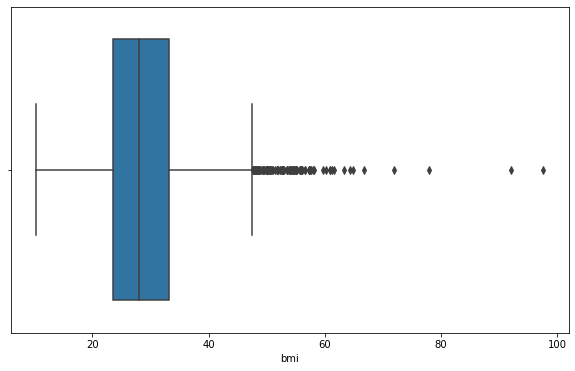

In [36]:
sns.boxplot(df.bmi)

In [44]:
df.bmi = df.bmi.fillna(df.bmi.mean())

In [45]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
ever_married_No      0
ever_married_Yes     0
dtype: int64

In [47]:
df.hypertension.value_counts(dropna = False)

0    4611
1     498
Name: hypertension, dtype: int64

In [48]:
df.heart_disease.value_counts(dropna = False)

0    4833
1     276
Name: heart_disease, dtype: int64

In [49]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0
hypertension,0,0,0,0,1,0,1,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57
bmi,36.6,28.89456,32.5,34.4,24.0,29.0,27.4,22.8,28.89456,24.2
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked,formerly smoked,never smoked,never smoked,Unknown,Unknown
stroke,1,1,1,1,1,1,1,1,1,1


In [50]:
df.work_type.value_counts(dropna = False)

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [51]:
df.Residence_type.value_counts(dropna = False)

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [52]:
df.avg_glucose_level.value_counts(dropna = False)

93.88     6
72.49     5
83.16     5
91.85     5
84.10     5
         ..
120.09    1
197.58    1
99.91     1
133.76    1
60.50     1
Name: avg_glucose_level, Length: 3978, dtype: int64

In [53]:
df.avg_glucose_level.isnull().sum()

0

In [67]:
df.bmi.sort_values().head(20)

1609    10.3
3307    11.3
2187    11.5
657     12.0
922     12.3
3319    12.8
3968    13.0
3619    13.2
4694    13.3
1701    13.4
3321    13.5
2175    13.7
4927    13.7
425     13.8
3942    13.8
4021    13.9
4527    14.0
4196    14.1
1930    14.1
2812    14.1
Name: bmi, dtype: float64

In [68]:
df.bmi.sort_values().tail(20)

4475    57.2
1595    57.3
715     57.5
1898    57.7
4351    57.9
3060    58.1
3588    59.7
466     60.2
4838    60.9
270     60.9
2840    61.2
3825    61.6
2764    63.3
4188    64.4
358     64.8
1559    66.8
544     71.9
928     78.0
4209    92.0
2128    97.6
Name: bmi, dtype: float64

C:\Users\ContraVolta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

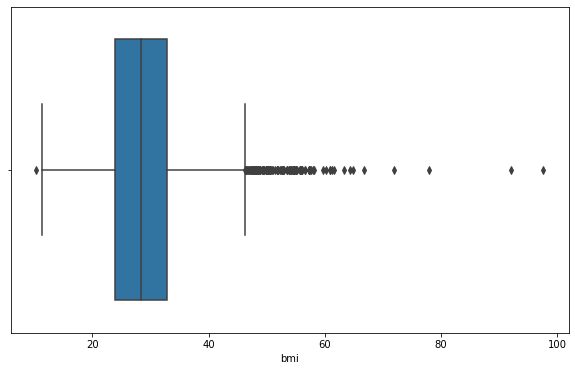

In [69]:
sns.boxplot(df.bmi)

In [70]:
df.head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.89456,32.5,34.4,24.0
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked
stroke,1,1,1,1,1


In [71]:
df.smoking_status.value_counts(dropna = False)

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='Count'>

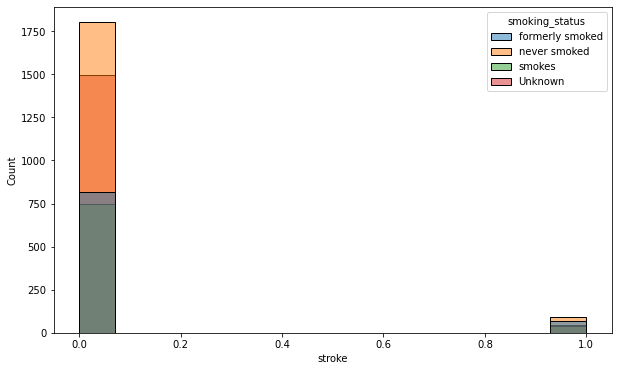

In [75]:
sns.histplot(data=df, x='stroke',hue='smoking_status')

In [82]:
df[df["stroke"]==1].smoking_status.value_counts()

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

In [80]:
df[(df["smoking_status"] == "Unknown") & (df["stroke"] == 1)]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_No,ever_married_Yes
8,Female,59.00,0,0,Private,Rural,76.15,28.89456,Unknown,1,0,1
9,Female,78.00,0,0,Private,Urban,58.57,24.20000,Unknown,1,0,1
13,Male,78.00,0,1,Private,Urban,219.84,28.89456,Unknown,1,0,1
19,Male,57.00,0,1,Govt_job,Urban,217.08,28.89456,Unknown,1,1,0
23,Male,82.00,0,1,Private,Rural,208.30,32.50000,Unknown,1,0,1
27,Male,58.00,0,0,Private,Rural,189.84,28.89456,Unknown,1,0,1
31,Male,42.00,0,0,Private,Rural,83.41,25.40000,Unknown,1,0,1
38,Male,58.00,0,0,Private,Rural,92.62,32.00000,Unknown,1,1,0
46,Female,75.00,0,1,Self-employed,Urban,109.78,28.89456,Unknown,1,1,0
50,Female,76.00,0,0,Private,Urban,89.96,28.89456,Unknown,1,1,0


In [ ]:
#pip install pandas-profiling

import pandas_profiling
pandas_profiling.ProfileReport(df)

In [84]:
df.drop("smoking_status", axis = 1, inplace=True)

In [85]:
df.head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.89456,32.5,34.4,24.0
stroke,1,1,1,1,1
ever_married_No,0,0,0,0,0


In [86]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
ever_married_No      0
ever_married_Yes     0
dtype: int64

In [87]:
df.shape

(5109, 11)

# Model

In [88]:

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<AxesSubplot:>

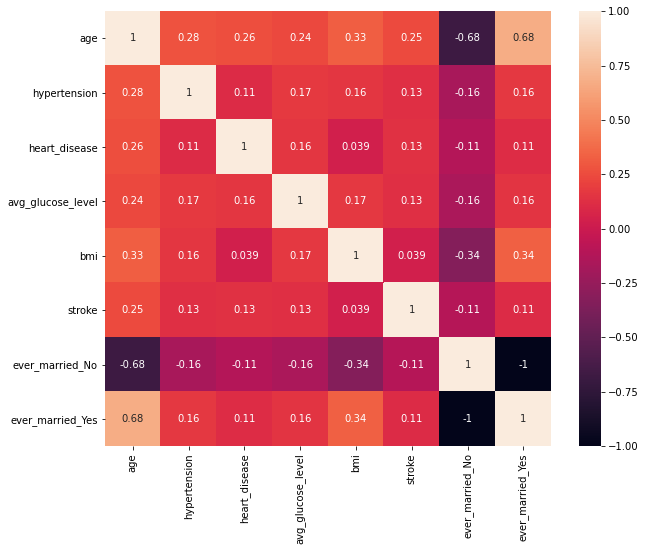

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [91]:
df.drop("ever_married_No", axis = 1, inplace=True)

In [92]:
df.drop("ever_married_Yes", axis = 1, inplace=True)

<AxesSubplot:>

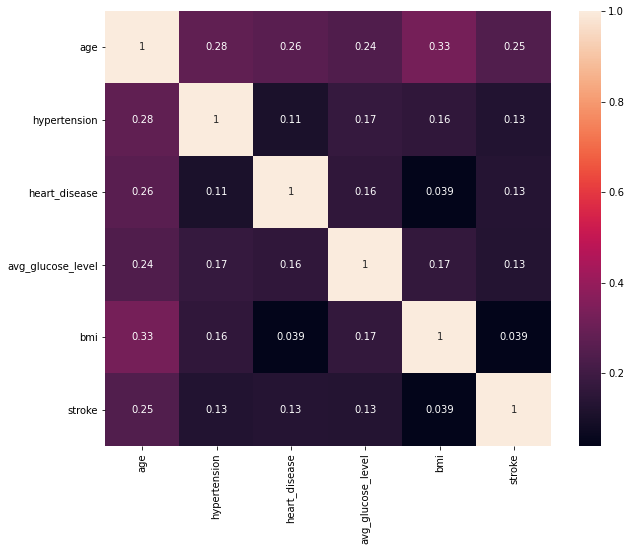

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

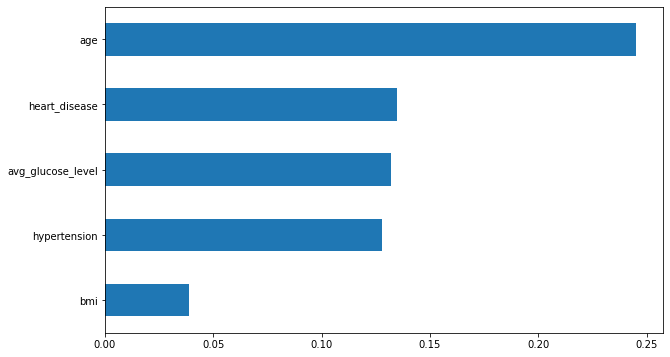

In [94]:
df.corr()["stroke"].drop("stroke").sort_values().plot.barh()

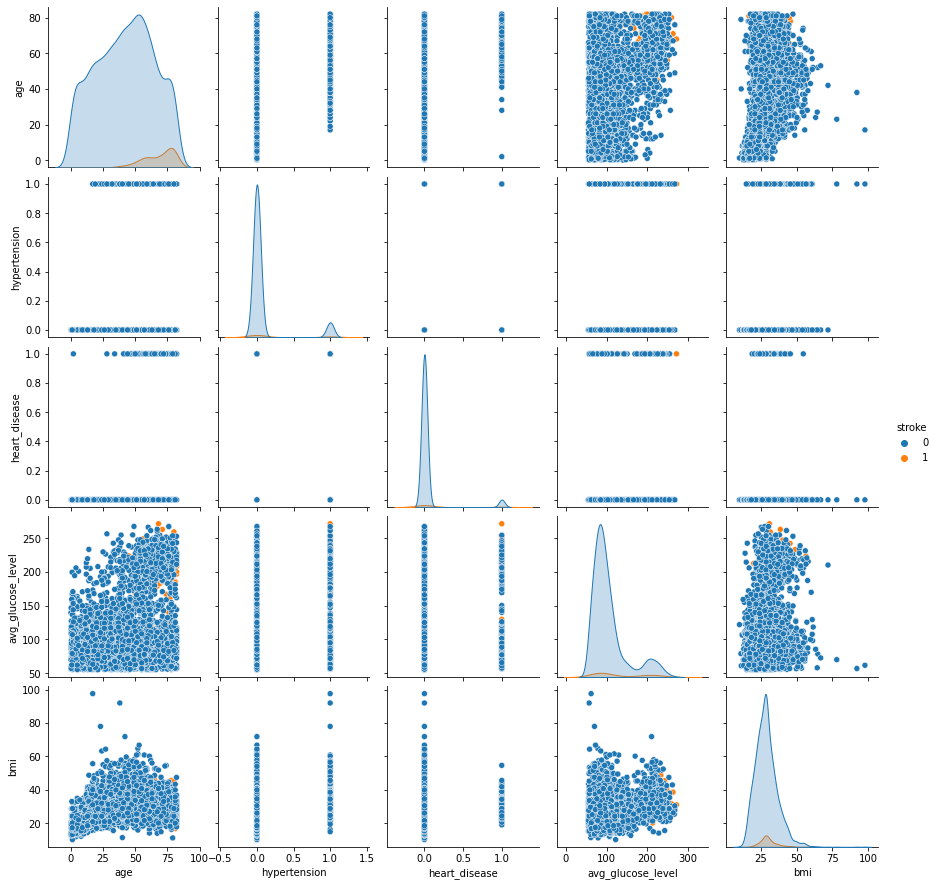

In [95]:
sns.pairplot(df, hue = "stroke")

# get dummies

In [102]:
df = pd.get_dummies(df, drop_first=True)

In [103]:
df.shape

(5109, 12)

In [104]:
df.head().T

,0,1,2,3,4
age,67.000,61.000,80.000,49.000,79.000
hypertension,0.000,0.000,0.000,0.000,1.000
heart_disease,1.000,0.000,1.000,0.000,0.000
avg_glucose_level,228.690,202.210,105.920,171.230,174.120
bmi,36.600,28.895,32.500,34.400,24.000
stroke,1.000,1.000,1.000,1.000,1.000
gender_Male,1.000,0.000,1.000,0.000,0.000
work_type_Never_worked,0.000,0.000,0.000,0.000,0.000
work_type_Private,1.000,0.000,1.000,1.000,0.000
work_type_Self-employed,0.000,1.000,0.000,0.000,1.000


In [105]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban'],
      dtype='object')

In [106]:
X=df.drop(["stroke"], axis=1)
y=df["stroke"]

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
scaler = StandardScaler()

In [110]:
X_train_scaled = scaler.fit_transform(X_train)  # fit ve transformu beraber aynı kod ile yaptık.

X_test_scaled = scaler.transform(X_test)

In [111]:
df.shape

(5109, 12)

<AxesSubplot:xlabel='stroke', ylabel='count'>

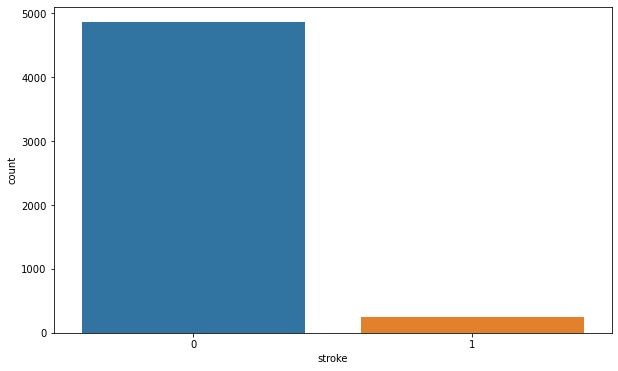

In [113]:
sns.countplot(df.stroke)  # balance yap

In [170]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight = "balanced")

In [167]:
log_model_2 = LogisticRegression()
log_model_2.fit(X_train_scaled, y_train)
y_pred=log_model_2.predict(X_test_scaled)
y_pred_proba = log_model_2.predict_proba(X_test_scaled)

In [171]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [172]:
y_pred=log_model.predict(X_test_scaled)

In [173]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [174]:
test_data = pd.concat([X_test, y_test], axis=1)  # test_data'yı geçici olarak kullancağım. amacım outcome ile predleri kıyaslamak.
test_data["pred"] = y_pred  # test_datama pred değerlerimi ekliyorum
test_data["pred_proba"] = y_pred_proba[:,1]   # proba değerlerimi ekliyorum. 1 olma olasılıklarını kullanacağım dolayısıyla listedik 2. elemanları aldım.
test_data.sample(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,stroke,pred,pred_proba
1614,0.080,0,0,139.670,14.100,0,0,0,0,1,1,0,0,0.061
1482,41.000,0,0,80.280,37.300,0,0,0,0,0,1,0,0,0.168
1504,42.000,0,0,86.070,27.300,1,0,0,1,0,1,0,0,0.127
62,67.000,1,0,61.940,25.300,0,0,0,1,0,0,1,1,0.649
2314,82.000,0,0,89.830,24.700,1,0,1,0,0,1,0,1,0.847
3906,56.000,0,0,122.390,30.300,1,0,0,0,0,1,0,0,0.404
4089,36.000,0,0,57.590,32.800,1,0,0,0,0,1,0,0,0.093
3524,58.000,0,0,79.950,25.900,1,0,1,0,0,1,0,0,0.436
1907,26.000,0,0,154.080,20.200,0,0,1,0,0,0,0,0,0.079
1932,36.000,0,0,100.330,23.200,0,0,1,0,0,0,0,0,0.133


In [168]:
# not balance
test_data = pd.concat([X_test, y_test], axis=1)  # test_data'yı geçici olarak kullancağım. amacım outcome ile predleri kıyaslamak.
test_data["pred"] = y_pred  # test_datama pred değerlerimi ekliyorum
test_data["pred_proba"] = y_pred_proba[:,1]   # proba değerlerimi ekliyorum. 1 olma olasılıklarını kullanacağım dolayısıyla listedik 2. elemanları aldım.
test_data.sample(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,stroke,pred,pred_proba
787,31.000,0,0,109.680,41.800,0,0,1,0,0,1,0,0,0.007
1200,76.000,0,0,198.020,38.700,0,0,1,0,0,1,0,0,0.220
848,53.000,0,0,189.490,25.800,0,0,0,0,0,0,0,0,0.038
3406,24.000,0,0,200.140,37.700,1,0,1,0,0,0,0,0,0.005
3506,27.000,0,0,112.410,33.700,1,0,1,0,0,0,0,0,0.005
3911,47.000,0,0,67.080,22.300,0,0,1,0,0,1,0,0,0.020
1471,7.000,0,0,87.940,28.895,1,0,0,0,1,1,0,0,0.004
1212,23.000,0,0,90.840,31.600,0,0,1,0,0,0,0,0,0.003
4716,82.000,0,0,96.980,21.500,0,0,1,0,0,0,0,0,0.201
681,16.000,0,0,74.980,21.400,0,0,1,0,0,0,0,0,0.002


In [118]:
from sklearn.metrics import confusion_matrix, classification_report

In [175]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1065  379]
 [  24   65]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1444
           1       0.15      0.73      0.24        89

    accuracy                           0.74      1533
   macro avg       0.56      0.73      0.54      1533
weighted avg       0.93      0.74      0.81      1533



In [169]:
# not balance 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# yüksek imbalance datada "balance" parametresi kullanılmadığında recall (truth değerler) gerçeği yansıtmaz. !!! recall da değişim var!!!

[[1444    0]
 [  89    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [139]:
from sklearn.model_selection import cross_validate

In [153]:
model = LogisticRegression(class_weight = "balanced")  #cross val. yaparken baştan yeni bir model objecti oluşturuyorum.
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores
df_scores.mean()[2:]

test_accuracy    0.748
test_precision   0.128
test_recall      0.794
test_f1          0.221
dtype: float64

In [154]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

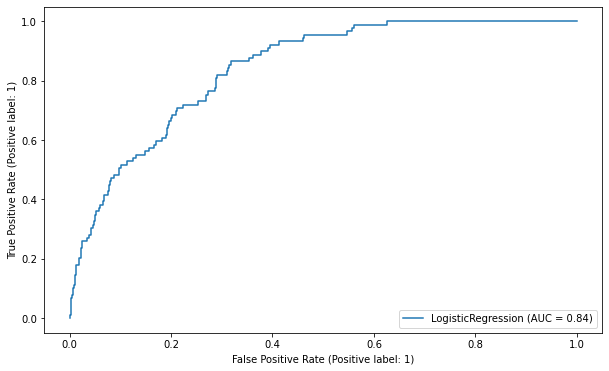

In [155]:
plot_roc_curve(log_model, X_test_scaled, y_test);

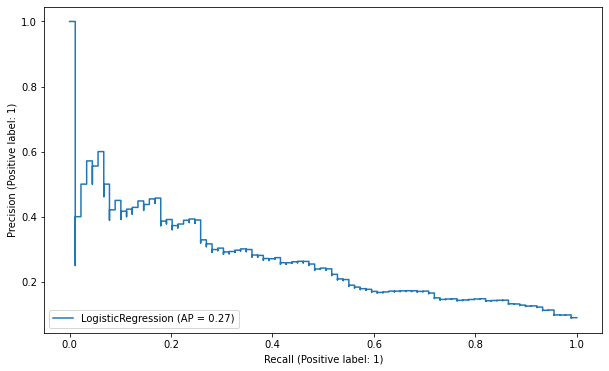

In [156]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

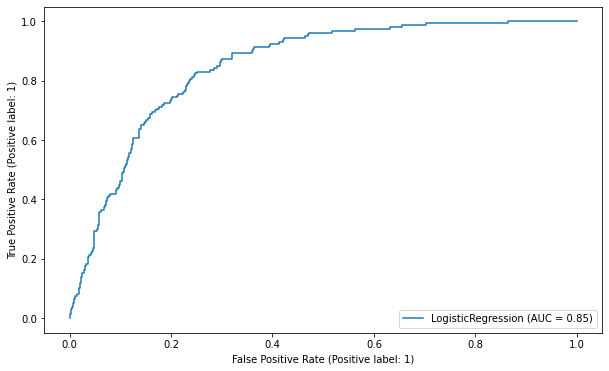

In [157]:
plot_roc_curve(log_model, X_train_scaled, y_train); # Dikkat! aşağıdaki grafik 1 olma durumuna göre çizildi.

In [158]:
y_pred_proba = log_model.predict_proba(X_train_scaled)  # predict_proba: prediction ımın 1 ve 0 olma olasılıklarını veriyor.

roc_auc_score(y_train, y_pred_proba[:,1])

0.8493120608899296

In [159]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [160]:
optimal_idx = np.argmax(tp_rate - fp_rate)  # index değerini veriyor. kaç numaralı index en iyi thresholdun olduğu index.
optimal_threshold = thresholds[optimal_idx]  # bu indeksteki threshold yani best threshold değerim.
optimal_threshold

0.5027143101762275

In [161]:
test_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,stroke,pred,pred_proba,pred2
4688,31.000,0,0,64.850,23.000,1,0,0,1,0,0,0,0,0.047,0
4478,40.000,0,0,65.290,28.300,1,0,0,1,0,0,0,0,0.093,0
3521,52.000,0,0,111.040,30.000,1,0,1,0,0,0,0,0,0.334,0
4355,79.000,1,0,76.640,19.500,0,0,0,1,0,0,0,1,0.836,1
3826,75.000,0,0,94.770,27.200,0,0,0,0,0,0,0,1,0.746,1


In [162]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [163]:
test_data.sample(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,stroke,pred,pred_proba,pred2
4054,41.000,0,1,186.540,39.000,0,0,1,0,0,0,0,0,0.350,0
1705,19.000,0,0,110.700,38.500,0,0,1,0,0,1,0,0,0.045,0
2784,48.000,0,0,127.130,35.000,1,0,1,0,0,0,0,0,0.283,0
3783,78.000,0,0,93.850,22.700,1,0,0,1,0,0,0,1,0.710,1
3128,66.000,0,0,59.620,32.400,0,0,0,0,0,0,0,1,0.552,1
3247,53.000,0,0,90.650,22.100,0,0,1,0,0,0,0,0,0.365,0
2988,44.000,0,0,60.320,25.000,1,0,1,0,0,0,0,0,0.172,0
3927,62.000,0,0,88.320,36.300,0,0,1,0,0,1,0,1,0.572,1
2644,18.000,0,0,101.090,19.300,0,0,1,0,0,0,0,0,0.034,0
3162,78.000,1,0,90.190,28.895,1,0,0,1,0,1,0,1,0.827,1


In [164]:
y_pred2 = test_data["pred2"]

In [165]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))  # balance

[[1066  378]
 [  24   65]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1444
           1       0.15      0.73      0.24        89

    accuracy                           0.74      1533
   macro avg       0.56      0.73      0.54      1533
weighted avg       0.93      0.74      0.81      1533



# final model

In [186]:
scaler = StandardScaler().fit(X)

In [187]:
import pickle
pickle.dump(scaler, open("scaler_stroke", 'wb'))

In [188]:
X_scaled = scaler.transform(X)
final_model = LogisticRegression(class_weight = "balanced").fit(X_scaled, y)


In [189]:
pickle.dump(final_model, open("final_model_stroke", 'wb'))

In [190]:
scaler_diabates = pickle.load(open("scaler_stroke", "rb"))

In [191]:
final_model = pickle.load(open("final_model_stroke", "rb"))